In [ ]:
# Project done by Basheer throughself study and references

# 1. https://pycaret.gitbook.io/docs
# 2. https://github.com/pycaret/examples
# 3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

! pip install pycaret

I chose PyCaret for my machine learning project because it streamlines the entire workflow by combining multiple libraries into one easy-to-use interface. With PyCaret, I can quickly automate tasks like model selection and hyperparameter tuning, allowing me to focus on interpreting results and visualizing insights. Plus, its low-code requirements make it perfect for rapid prototyping and exploration, making it an ideal choice for data science projects, academic assignments, and real-world business analytics applications – all while avoiding the complexity of using individual packages like scikit-learn, TensorFlow, and Hyperopt." </br>
I selected PyCaret due to its: </br>
1. Unified API for simplified workflow </br>
2. Automated model selection and hyperparameter tuning </br>
3. Rapid prototyping and visualization capabilities </br>
**PyCaret's low-code approach makes it an excellent alternative to using separate packages, ideal for data science projects and academic assignments.**


In [2]:
!pip show pycaret | grep Requires

Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick


# Let's begin the code with explanation </br>


**Loading and Exploring the HR Analyst Dataset** </br>
To begin analyzing the HR Employee Attrition dataset, I first imported the necessary libraries: </br>
**pandas** for data manipulation and analysis </br>
**pycaret.regression** for automated regression modeling </br>
Next, I loaded the HR Analyst dataset from a CSV file located at **/content/HR-Employee-Attrition.csv** into a Pandas DataFrame called data.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

# Load the HR Analyst dataset (assuming it's in CSV format)
data = pd.read_csv('/content/HR-Employee-Attrition.csv')

# View the first few rows of the dataset
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

HR Employee Attrition dataset using **data.info(**), **data.columns**, and **data.describe()** to understand its structure, composition, and statistical properties. These checks provided insights into variable types, data distribution, and potential issues. This foundation will inform data preprocessing, feature engineering, and analysis strategies.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Checking for missing values
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


## Replacing columns values(Converting Oject-dtype to int-dtype)

In [15]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
data['Attrition'] = data['Attrition'].replace({'Yes': 1, 'No': 0})
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [24]:
data['Attrition'].value_counts()

,count
Attrition,
0,1233
1,237


In [22]:
data['EducationField'].replace({'Life Sciences': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5, 'Other': 6}, inplace=True)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [23]:
data['EducationField'].value_counts()

,count
EducationField,
1,606
2,464
3,159
4,132
6,82
5,27


In [26]:
data['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
data['Gender'].value_counts()

,count
Gender,
1,882
0,588


In [27]:
data['OverTime'].replace({'Yes': 1, 'No': 0}, inplace=True)
data['OverTime'].value_counts()

,count
OverTime,
0,1054
1,416


In [28]:
data['Department'].replace({'Sales': 1, 'Research & Development': 2, 'Human Resources': 3}, inplace=True)
data['Department'].value_counts()

,count
Department,
2,961
1,446
3,63


In [29]:
data['BusinessTravel'].replace({'Travel_Rarely': 1, 'Travel_Frequently': 2, 'Non-Travel': 3}, inplace=True)
data['BusinessTravel'].value_counts()

,count
BusinessTravel,
1,1043
2,277
3,150


In [30]:
data['MaritalStatus'].replace({'Single': 1, 'Married': 2, 'Divorced': 3}, inplace=True)
data['MaritalStatus'].value_counts()

,count
MaritalStatus,
2,673
1,470
3,327


In [32]:
data['JobRole'].replace({'Sales Executive': 1, 'Research Scientist': 2, 'Laboratory Technician': 3, 'Manufacturing Director': 4, 'Healthcare Representative': 5, 'Manager': 6, 'Sales Representative': 7, 'Research Director': 8, 'Human Resources': 9}, inplace=True)
data['JobRole'].value_counts()

,count
JobRole,
1,326
2,292
3,259
4,145
5,131
6,102
7,83
8,80
9,52


In [37]:
data['Over18'].replace({'Y': 1, 'N': 0}, inplace=True)
data['Over18'].value_counts()


,count
Over18,
1,1470


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Let's dive into various Attrition for better understanding Employee Analysis

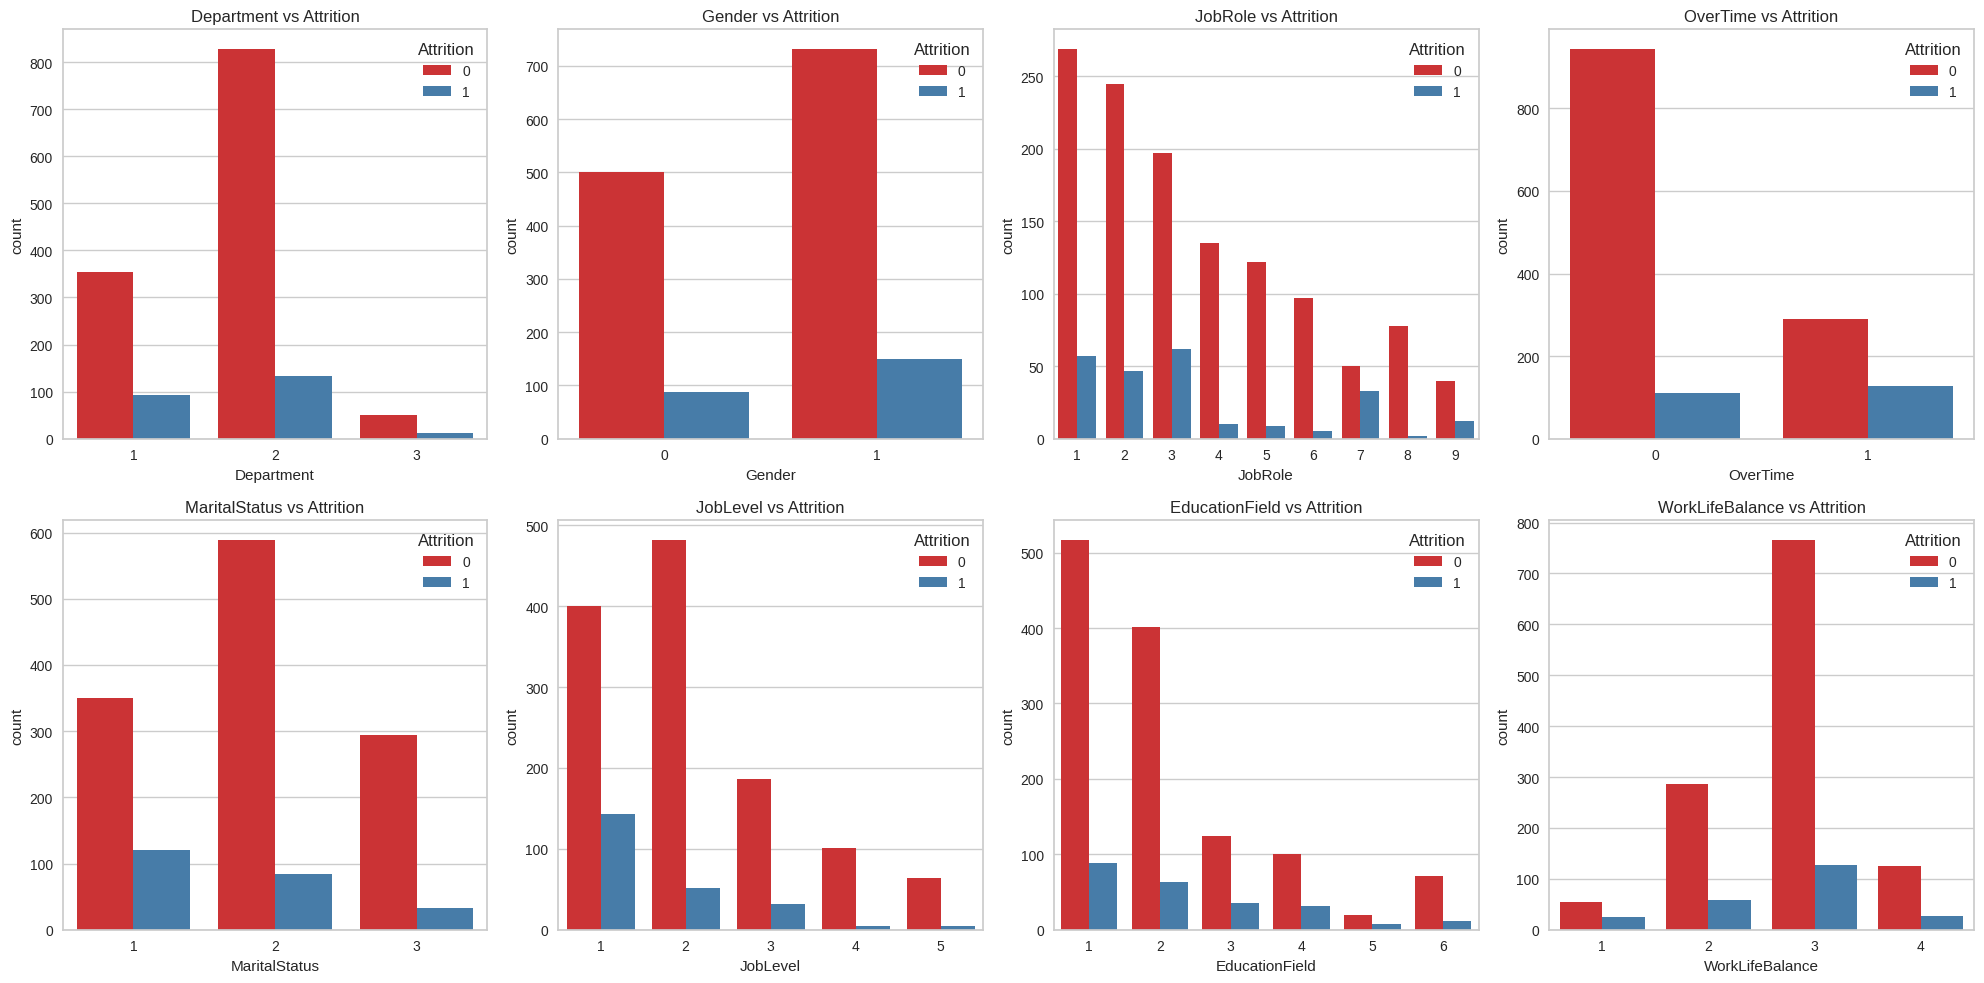

In [38]:
# Define columns to visualize with Attrition
columns_to_plot = ['Department', 'Gender', 'JobRole', 'OverTime', 'MaritalStatus', 'JobLevel', 'EducationField', 'WorkLifeBalance']

# Set up the figure size and layout
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

# Generate count plots for each column vs Attrition
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=data, x=column, hue='Attrition', ax=axes[i], palette='Set1')
    axes[i].set_title(f'{column} vs Attrition')
    axes[i].legend(title='Attrition')

# Adjust layout
plt.tight_layout()
plt.show()

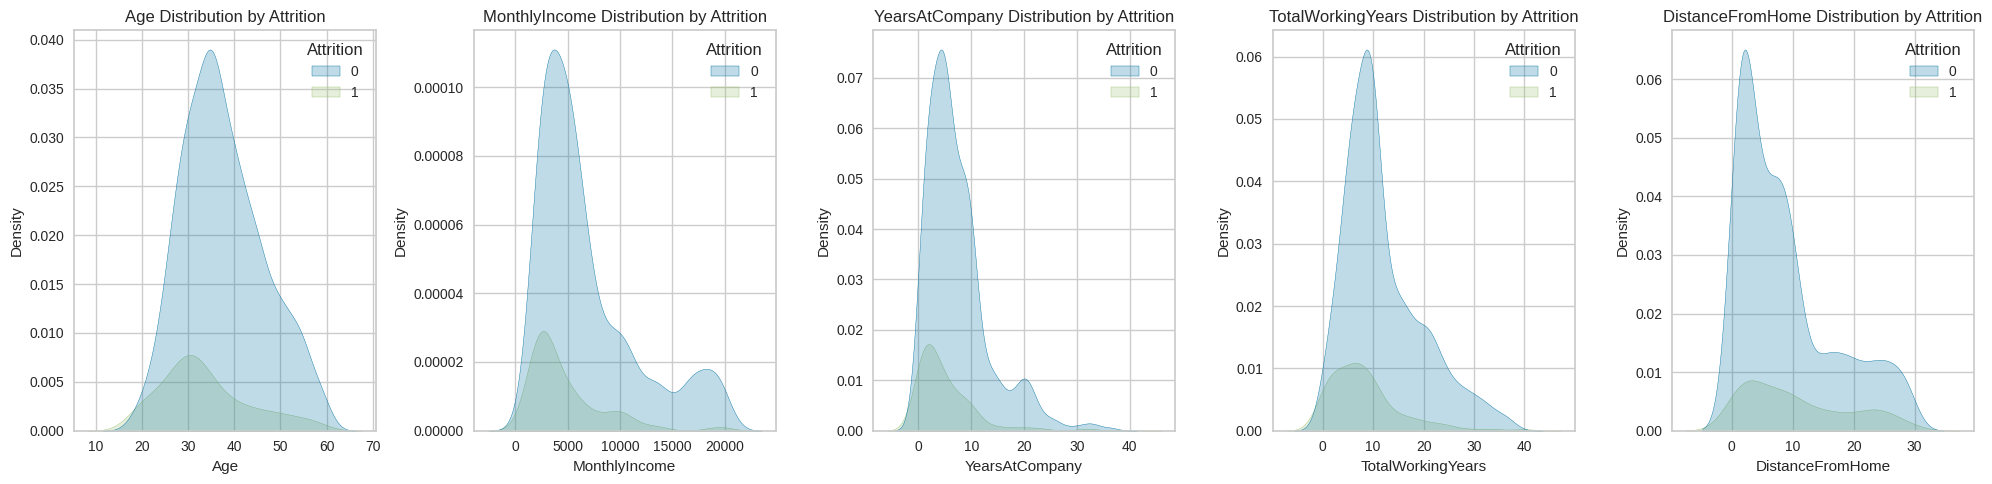

In [39]:
numerical_columns = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 'DistanceFromHome']

fig, axes = plt.subplots(1, len(numerical_columns), figsize=(20, 5))
for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=data, x=col, hue='Attrition', ax=axes[i], fill=True)
    axes[i].set_title(f'{col} Distribution by Attrition')

plt.tight_layout()
plt.show()

In [40]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [41]:
# Initialize PyCaret environment
clf = setup(data, target='Attrition', use_gpu=True, verbose=True)

# Compare models
best_model = compare_models()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,2098
1,Target,Attrition
2,Target type,Regression
3,Original data shape,"(1470, 35)"
4,Transformed data shape,"(1470, 35)"
5,Transformed train set shape,"(1029, 35)"
6,Transformed test set shape,"(441, 35)"
7,Numeric features,34
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2180,0.1043,0.3211,0.1954,0.2275,0.6311,0.4370
et,Extra Trees Regressor,0.2146,0.1062,0.3233,0.1818,0.2307,0.6225,0.4640
lightgbm,Light Gradient Boosting Machine,0.2227,0.1077,0.3259,0.1679,0.2316,0.6134,0.4390
rf,Random Forest Regressor,0.2201,0.1084,0.3270,0.1650,0.2333,0.6417,0.6570
ridge,Ridge Regression,0.2430,0.1087,0.3284,0.1627,0.2327,0.6591,0.0380
lr,Linear Regression,0.2431,0.1087,0.3285,0.1625,0.2327,0.6586,0.0410
br,Bayesian Ridge,0.2426,0.1091,0.3289,0.1620,0.2319,0.6839,0.1200
lar,Least Angle Regression,0.2504,0.1112,0.3323,0.1436,0.2379,0.6502,0.0410
xgboost,Extreme Gradient Boosting,0.2218,0.1187,0.3425,0.0741,0.2441,0.6365,0.2670
omp,Orthogonal Matching Pursuit,0.2605,0.1299,0.3586,0.0103,0.2524,0.8143,0.0330


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [42]:
# Tune the model
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2307,0.1082,0.3290,0.2805,0.2260,0.6594
1,0.2689,0.1469,0.3832,0.1256,0.2624,0.7090
2,0.2243,0.0988,0.3143,0.2832,0.2257,0.5621
3,0.2056,0.0774,0.2782,0.1174,0.2080,0.6207
4,0.2411,0.1191,0.3451,0.2085,0.2407,0.6333
5,0.2617,0.1205,0.3472,0.2824,0.2410,0.6220
6,0.1969,0.0795,0.2820,0.3940,0.1958,0.5478
7,0.1938,0.0744,0.2728,0.4021,0.1944,0.5518
8,0.2027,0.0887,0.2978,0.1385,0.2184,0.6052


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [43]:
# Tune the best model with custom parameters
tuned_model = tune_model(best_model,
                         fold=5,
                         verbose=True,
                         n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2388,0.1329,0.3645,0.1664,0.2518,0.7134
1,0.2008,0.0884,0.2973,0.2238,0.2147,0.6143
2,0.2443,0.1267,0.3559,0.2053,0.2443,0.6781
3,0.1905,0.0716,0.2677,0.4396,0.1893,0.5316
4,0.2017,0.0917,0.3028,0.0797,0.2212,0.6699
Mean,0.2152,0.1023,0.3176,0.2229,0.2243,0.6414
Std,0.0219,0.0236,0.0369,0.1191,0.0223,0.0634


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [44]:
# Make predictions
predictions = predict_model(best_model, data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.1667,0.0650,0.2550,0.5190,0.1785,0.4808


In [45]:
# Evaluate model performance
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…